In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

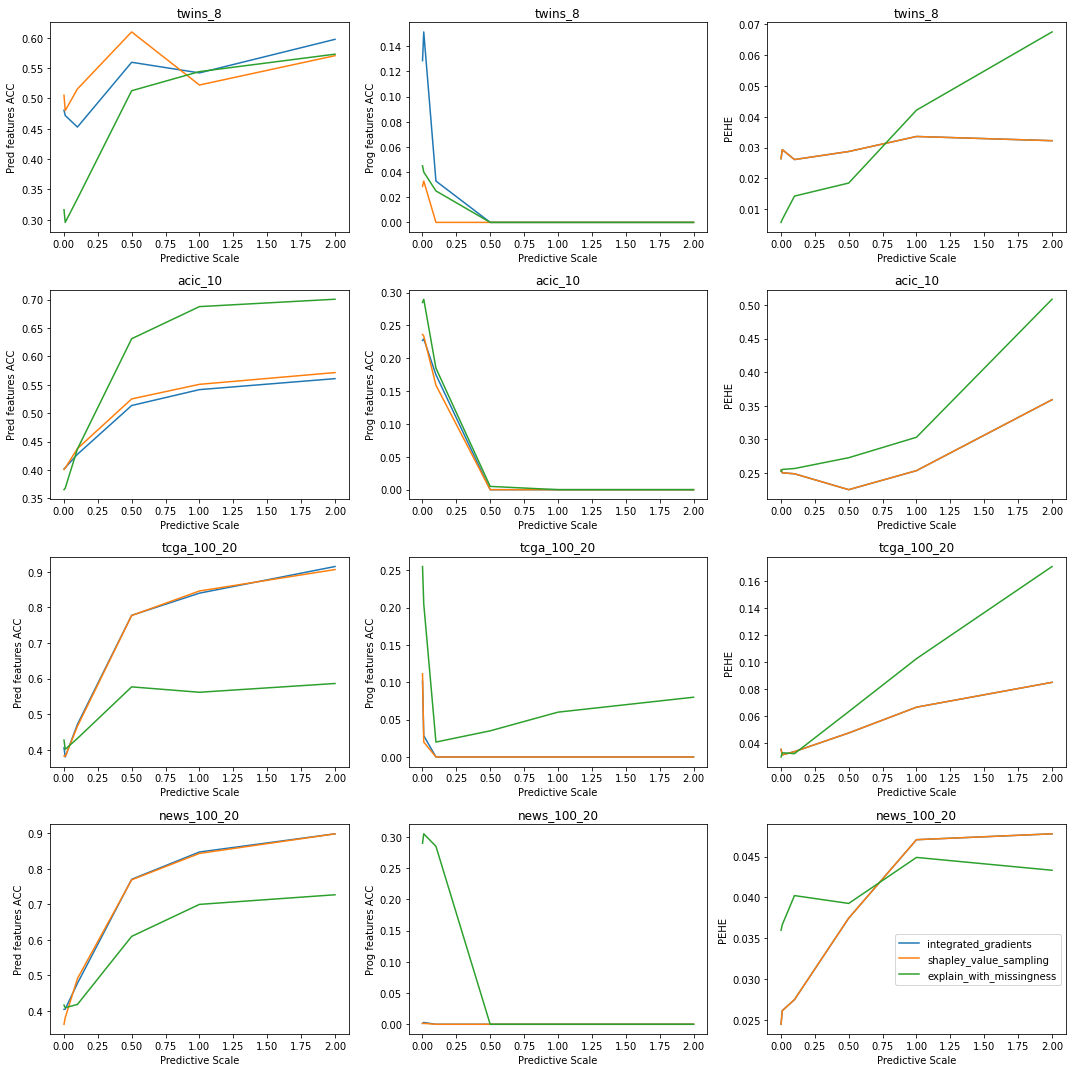

In [80]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
         "seed3",
         "seed4",
         "seed5"]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             #"naive_shap",
             "explain_with_missingness"]

scale = [1e-3, 1e-2, 1e-1, 0.5,  1, 2]

plt.figure(figsize=(15,15))

results_wo_mask = []
results_w_mask = []

for data_index in range(len(dataset_list)):
    for seed_index, seed in enumerate(seeds):
        
        predictive_sensitivity_acic = pd.read_csv("predictive_sensitivity/predictive_scale_"+ 
                                                  dataset_list[data_index]+
                                                  "_linear_random_True_binary_False-"+
                                                  seed+".csv",
                                                  index_col = 0)
        
        DRLearner = predictive_sensitivity_acic[predictive_sensitivity_acic.Learner == "DRLearner"].values

        results.append(DRLearner) 
            
        predictive_sensitivity_acic_mask = pd.read_csv("predictive_sensitivity_mask/predictive_scale_"+
                                                          dataset_list[data_index]+
                                                       "_linear_random_True_binary_False-_200testsamples_"+
                                                       seed+".csv",
                                                       index_col=0)
        
        results_w_mask.append(predictive_sensitivity_acic_mask.values)
        
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainer:
            if e == "explain_with_missingness":
                plt.plot(predictive_sensitivity_acic_mask["Predictive Scale"], predictive_sensitivity_acic_mask[metric]
                  ,label="explain_with_missingness")
            else:
                data = DRLearner[DRLearner.Explainer == e]
                plt.plot(data["Predictive Scale"], data[metric], label=e)

        plt.xlabel("Predictive Scale")
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5))

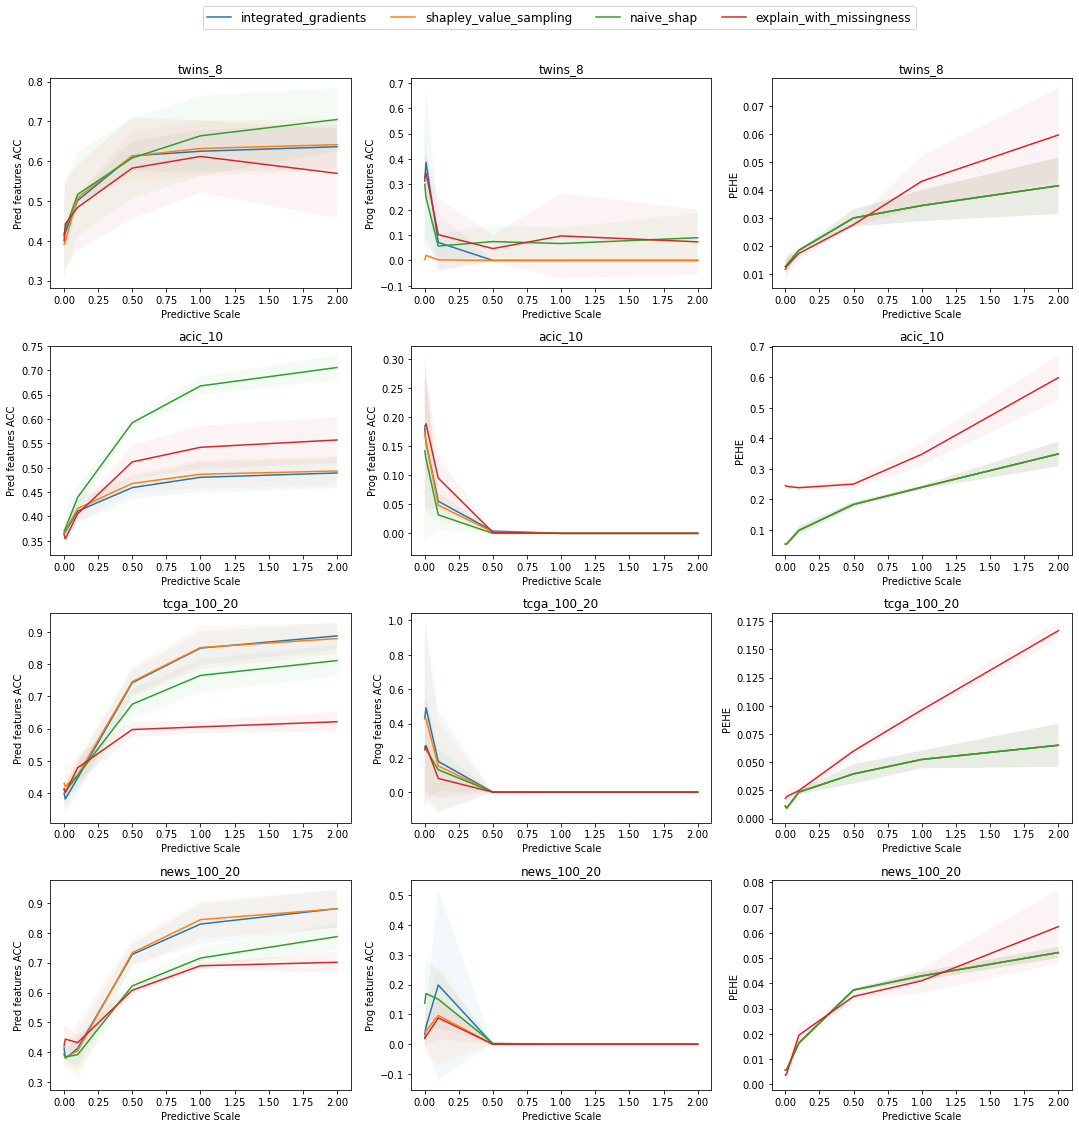

In [197]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
         "seed3",
         #"seed4",
         #"seed5"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "naive_shap",
             "explain_with_missingness"]

experiment_name = "Predictive Scale"
plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("predictive_sensitivity/predictive_scale_"+ 
                                                  dataset_list[data_index]+
                                                  "_linear_random_True_binary_False_200testsamples-"+
                                                  seed+".csv",
                                                  index_col = 0)
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
            
        data = pd.read_csv("predictive_sensitivity_mask/predictive_scale_"+
                                                          dataset_list[data_index]+
                                                       "_linear_random_True_binary_False-_200testsamples_"+
                                                       seed+".csv",
                                                       index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], mean[metric]-std[metric], mean[metric]+std[metric],  alpha=.05)
        
        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


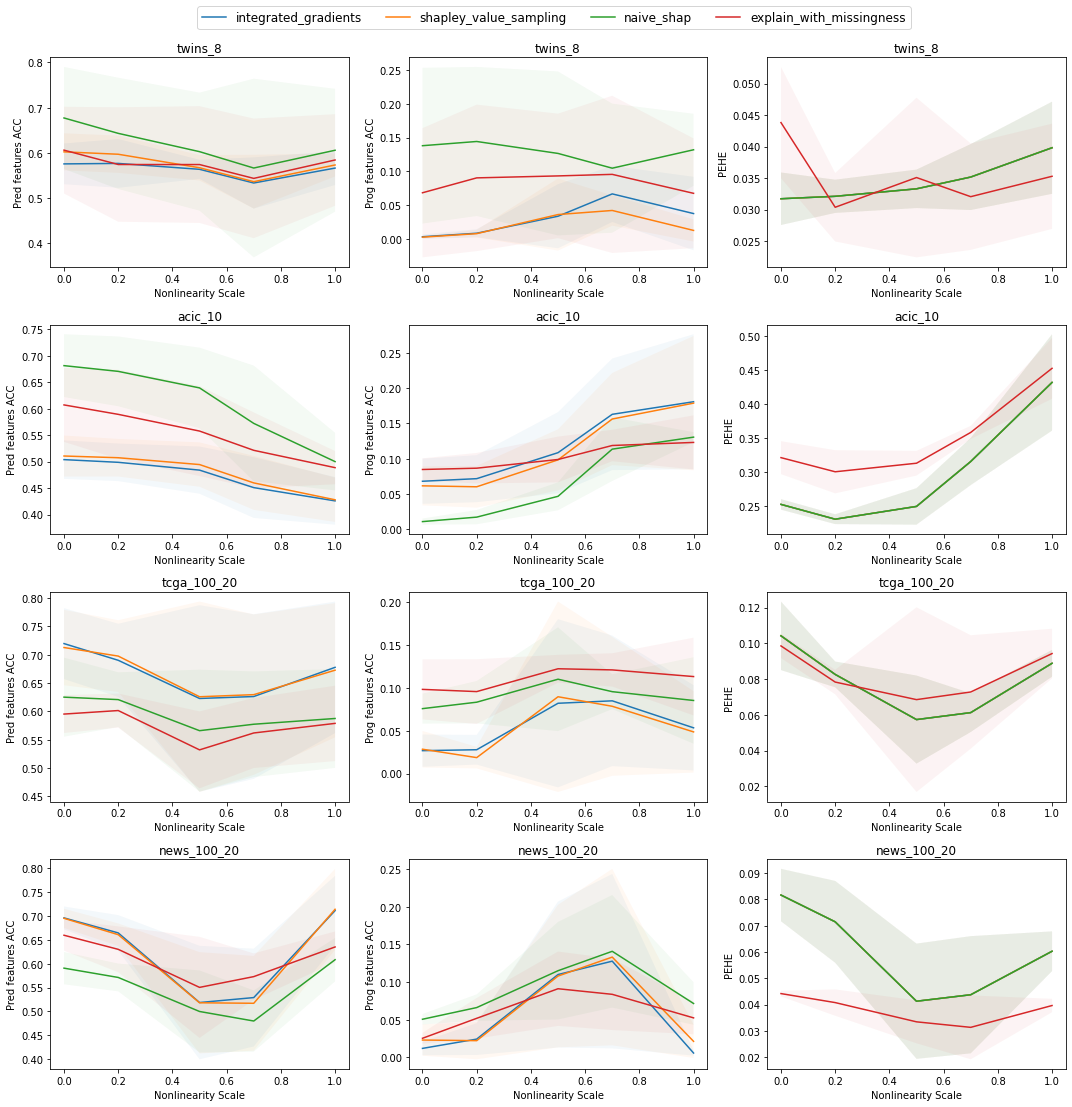

In [194]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         #"seed2",
         "seed3",
         "seed4",
         #"seed5",
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "naive_shap",
             "explain_with_missingness"]

experiment_name = "Nonlinearity Scale"
plt.figure(figsize=(15,15))

for data_index in range(len(dataset_list)):
    
    datasets_list = []
    
    for seed in seeds:
        
        data = pd.read_csv("nonlinearity_sensitivity/random/"+ 
                          dataset_list[data_index]+
                          "_binary_False_200testsamples-"+
                          seed+".csv",
                          index_col = 0)
        
        datasets_list.append(data[data.Learner == "DRLearner"]) 
            
        data = pd.read_csv("nonlinearity_sensitivity_mask/random/"+
                            dataset_list[data_index]+
                           "_binary_False_200testsamples-"+
                           seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index, metric in enumerate(metrics):

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], mean[metric]-std[metric], mean[metric]+std[metric],  alpha=5e-2)
        
        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.1),ncol=len(explainers),prop={'size': 12})

## Testing loss monitor

## Nonlinear

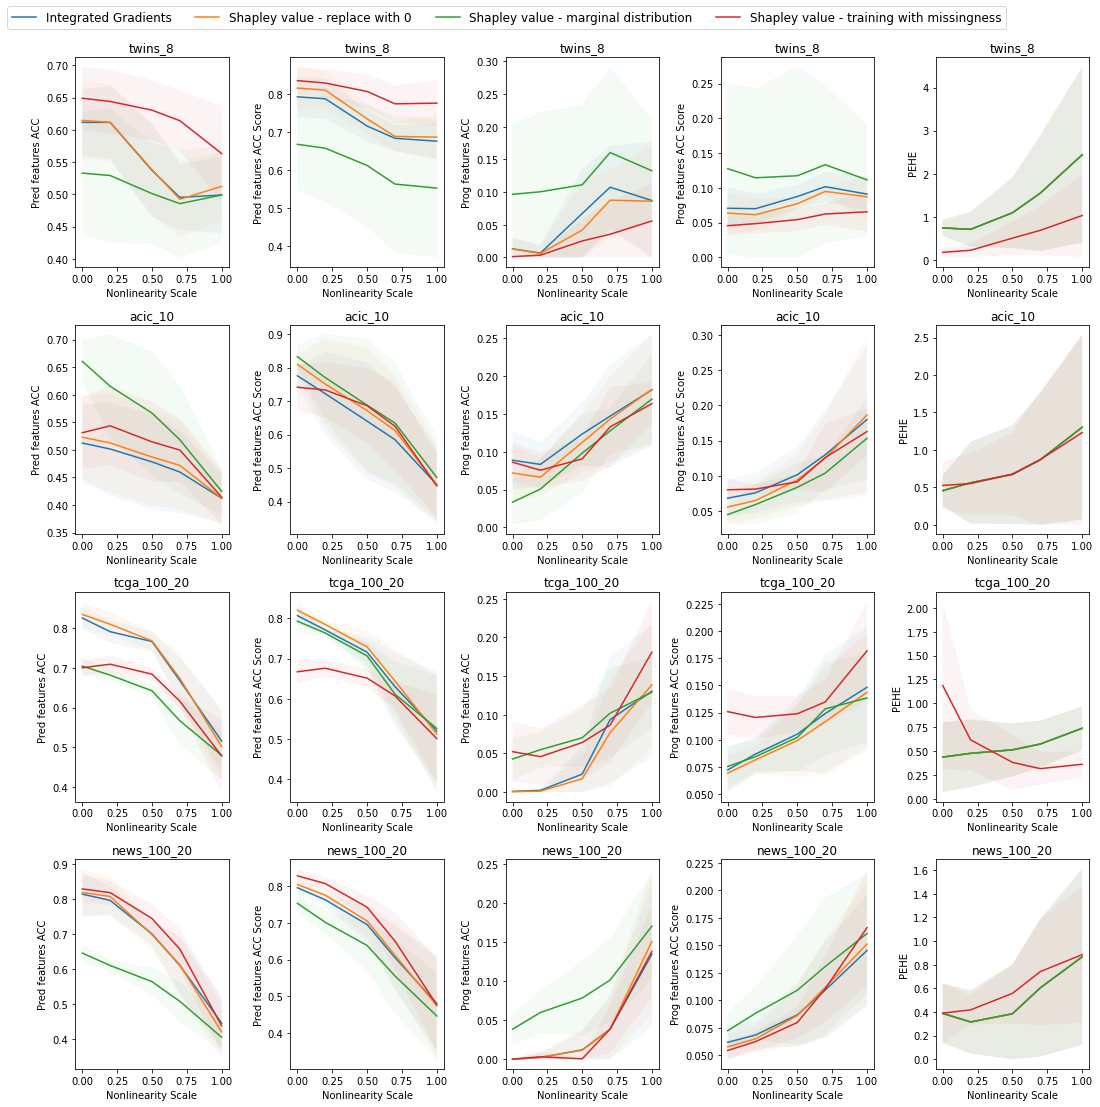

In [285]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Pred features ACC Score",
           "Prog features ACC",
           "Prog features ACC Score",
           "PEHE"]

seeds = ["seed1",
         "seed2",
         "seed3",
         "seed4",
         "seed5",
         #"seed6",
         # "seed7",
         #"seed8",
         #"seed9",
         #"seed10"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "naive_shap",
             "explain_with_missingness"]

experiment_name = "Nonlinearity Scale"
plt.figure(figsize=(15,15))

for data_index in range(len(dataset_list)):
    
    datasets_list = []
    
    for seed in seeds:
        
        data = pd.read_csv("nonlinearity_sensitivity/normalized/random/"+ 
                          dataset_list[data_index]+
                          "_binary_False_"+
                          seed+".csv",
                          index_col = 0)
        
        datasets_list.append(data[data.Learner == "DRLearner"]) 
            
        data = pd.read_csv("nonlinearity_sensitivity_mask/normalized/random/"+
                            dataset_list[data_index]+
                           "_binary_False_"+
                           seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index, metric in enumerate(metrics):

        plt.subplot(4, len(metrics), len(metrics)*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()
            
            if e == "shapley_value_sampling":
                e = "Shapley value - replace with 0"
            elif e == "naive_shap":
                e = "Shapley value - marginal distribution"
            elif e == "integrated_gradients":
                e = "Integrated Gradients"
            elif e == "explain_with_missingness":
                e = "Shapley value - training with missingness"
            
            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], 
                             np.where(mean[metric]-std[metric]>0, mean[metric]-std[metric],0),
                             mean[metric]+std[metric],  
                             alpha=.05)
        
        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.1),ncol=len(explainers),prop={'size': 12})


## Predictive Linear

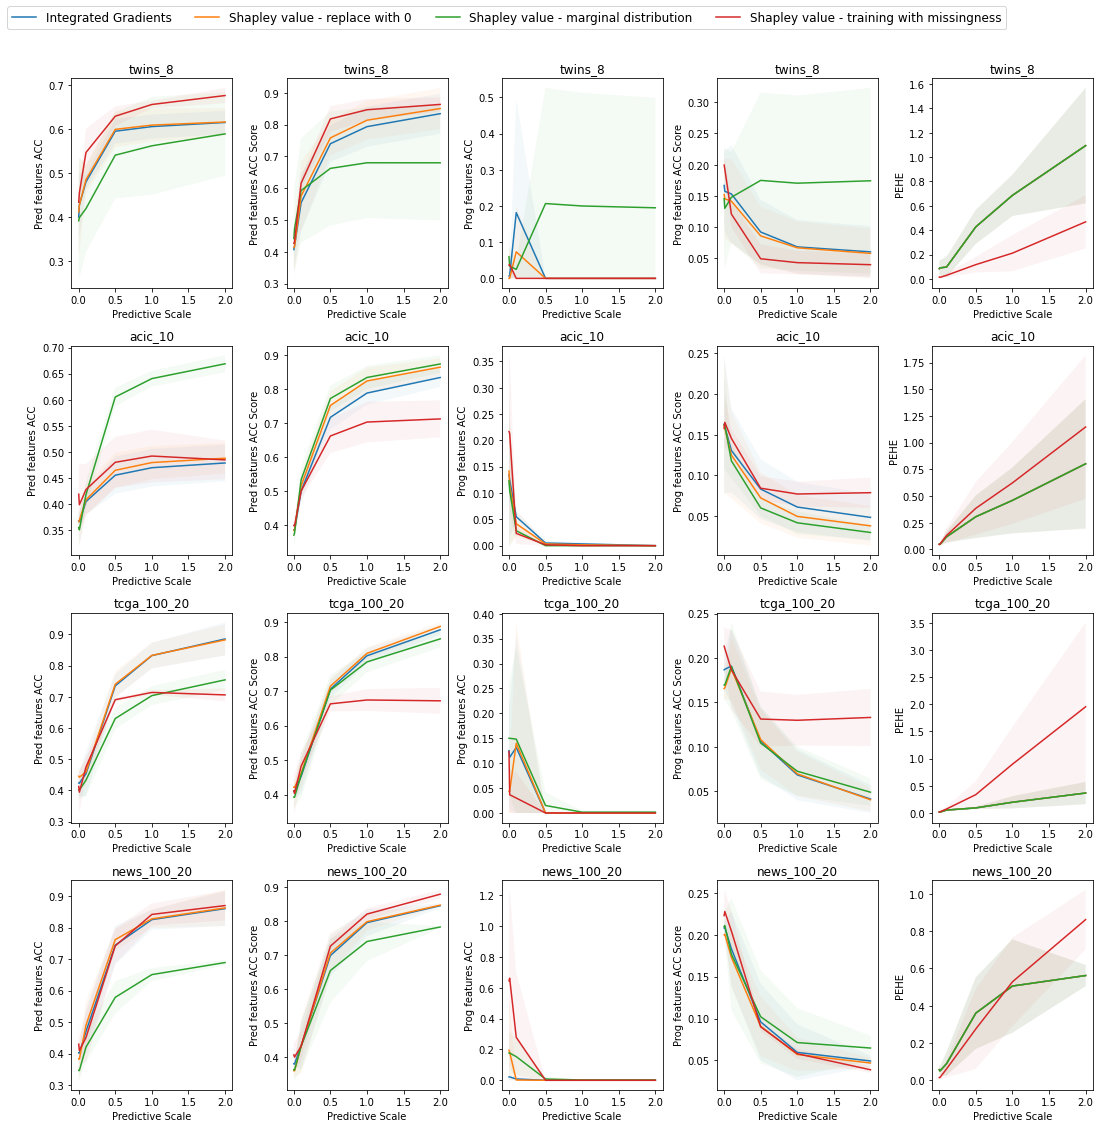

In [286]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Pred features ACC Score",
           "Prog features ACC",
           "Prog features ACC Score",
           "PEHE"]

seeds = ["seed1",
         "seed2",
        "seed3",
         #"seed4",
         #"seed5",
         # "seed6",
         # "seed7",
         #"seed8",
         #"seed9",
         #"seed10"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "naive_shap",
             "explain_with_missingness"]

experiment_name = "Predictive Scale"
plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("predictive_sensitivity/normalized/predictive_scale_"+ 
                                                  dataset_list[data_index]+
                                                  "_linear_random_True_binary_False_"+
                                                  seed+".csv",
                                                  index_col = 0)
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
            
        data = pd.read_csv("predictive_sensitivity_mask/normalized/predictive_scale_"+
                                                       dataset_list[data_index]+
                                                       "_linear_random_True_binary_False_"+
                                                       seed+".csv",
                                                       index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, len(metrics), len(metrics)*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()
            
            if e == "shapley_value_sampling":
                e = "Shapley value - replace with 0"
            elif e == "naive_shap":
                e = "Shapley value - marginal distribution"
            elif e == "integrated_gradients":
                e = "Integrated Gradients"
            elif e == "explain_with_missingness":
                e = "Shapley value - training with missingness"
                
            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], np.where(mean[metric]-std[metric]>0, mean[metric]-std[metric],0), mean[metric]+std[metric],  alpha=.05)

        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


### Propensity == Pred

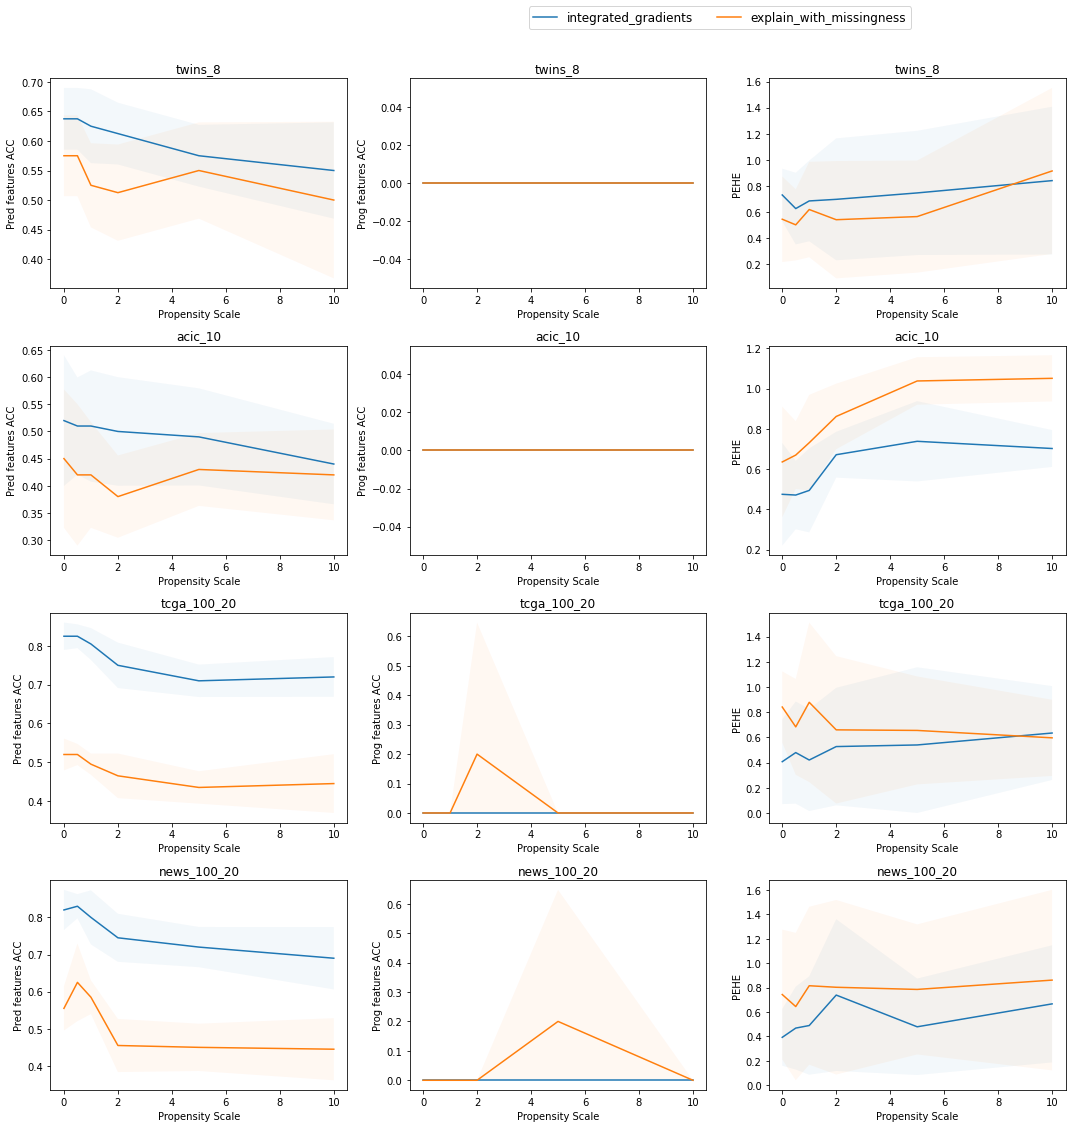

In [274]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
        "seed3",
         "seed4",
         "seed5"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
            # "shapley_value_sampling",
            # "naive_shap",
             "explain_with_missingness"]

experiment_name = "Propensity Scale"
propensity_type = "pred"

plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("propensity_sensitivity/normalized/linear/propensity_scale_"+
                              dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
        
        data = pd.read_csv("propensity_sensitivity_mask/normalized/linear/propensity_scale_"+
                              dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], np.where(mean[metric]-std[metric]>0, mean[metric]-std[metric],0), mean[metric]+std[metric],  alpha=.05)

        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


### Propensity - prog

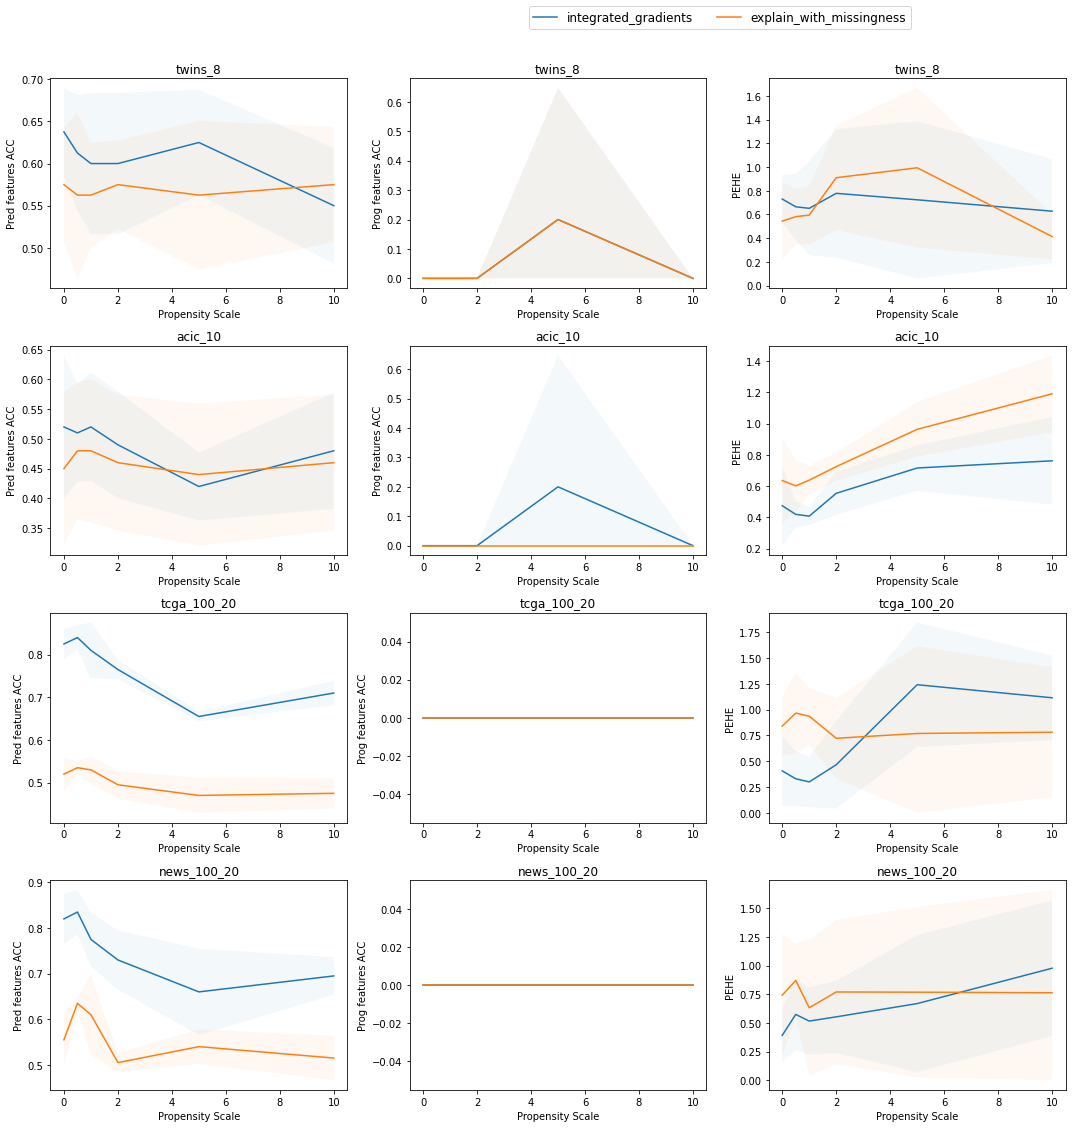

In [275]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
        "seed3",
         "seed4",
         "seed5"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
            # "shapley_value_sampling",
            # "naive_shap",
             "explain_with_missingness"]

experiment_name = "Propensity Scale"
propensity_type = "prog"

plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("propensity_sensitivity/normalized/linear/propensity_scale_"+
                           dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
        
        data = pd.read_csv("propensity_sensitivity_mask/normalized/linear/propensity_scale_"+
                            dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], np.where(mean[metric]-std[metric]>0, mean[metric]-std[metric],0), mean[metric]+std[metric],  alpha=.05)

        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


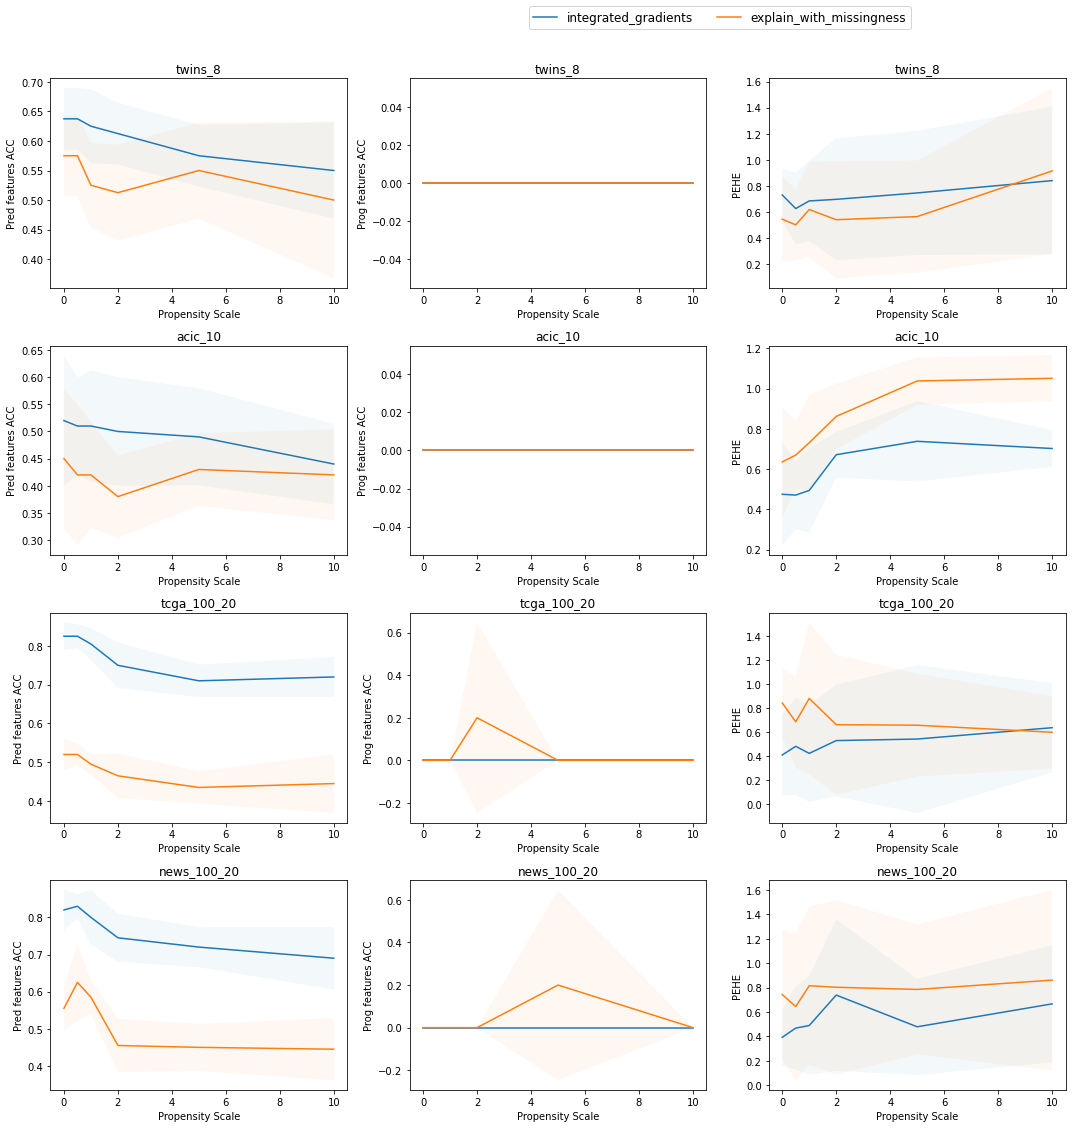

In [252]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
        "seed3",
         "seed4",
         "seed5"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
            # "shapley_value_sampling",
            # "naive_shap",
             "explain_with_missingness"]

experiment_name = "Propensity Scale"
propensity_type = "pred"

plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("propensity_sensitivity/normalized/linear/propensity_scale_"+
                           dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
        
        data = pd.read_csv("propensity_sensitivity_mask/normalized/linear/propensity_scale_"+
                            dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], mean[metric]-std[metric], mean[metric]+std[metric],  alpha=.05)
        
        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


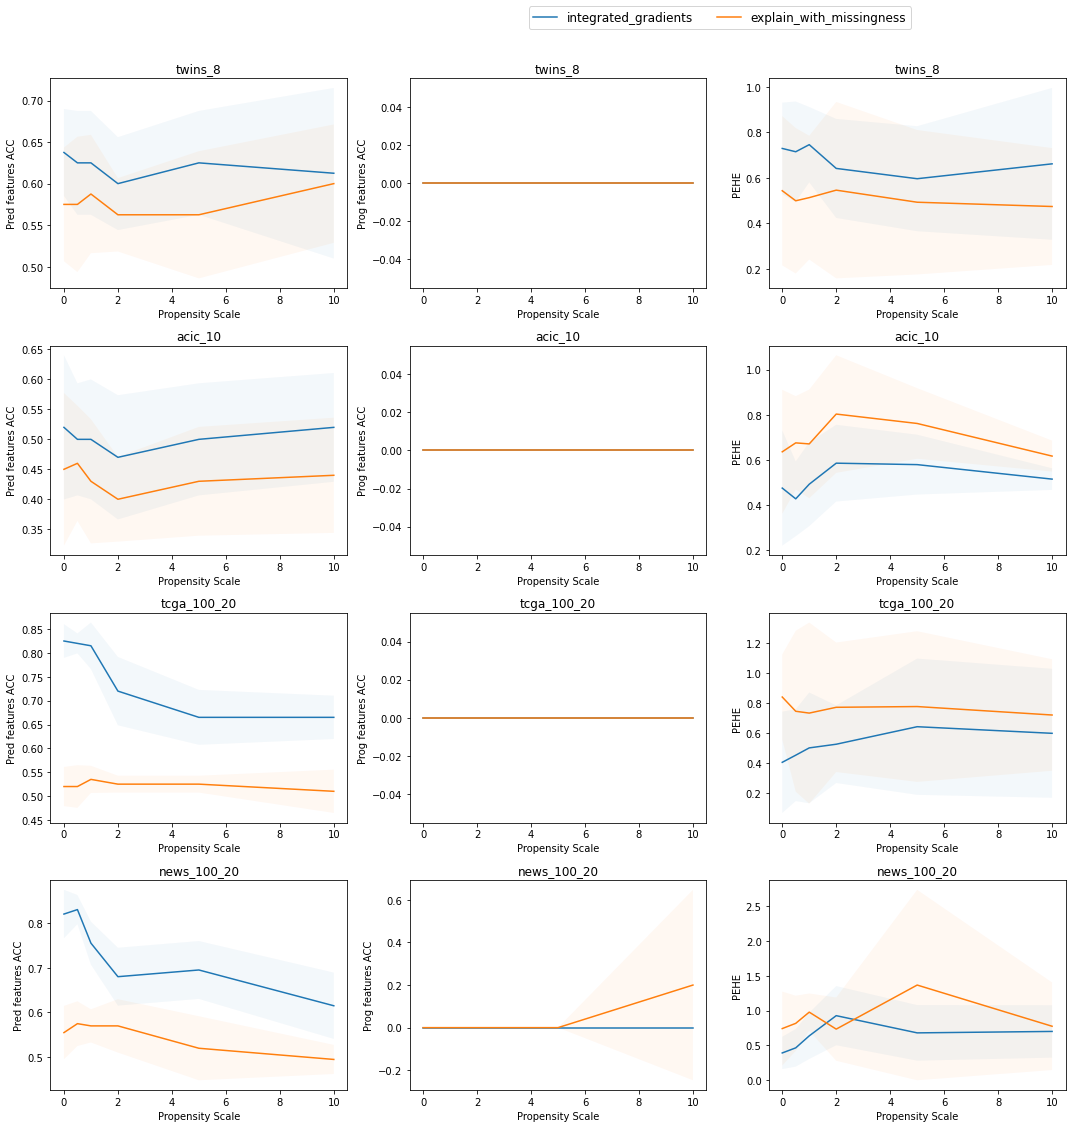

In [256]:
dataset_list = [
                   "twins_8",
                   "acic_10",
                   "tcga_100_20",
                    "news_100_20"
                   ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

seeds = ["seed1",
         "seed2",
        "seed3",
         "seed4",
         "seed5"
        ]

explainers = [#"feature_ablation",
             #"feature_permutation",
             "integrated_gradients",
            # "shapley_value_sampling",
            # "naive_shap",
             "explain_with_missingness"]

experiment_name = "Propensity Scale"
propensity_type = "irrelevant_var"

plt.figure(figsize=(15,15))



for data_index in range(len(dataset_list)):
    datasets_list = []
    
    for seed_index, seed in enumerate(seeds):
        
        data = pd.read_csv("propensity_sensitivity/normalized/linear/propensity_scale_"+
                           dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        
        data = data[data.Learner == "DRLearner"]
        datasets_list.append(data) 
        
        data = pd.read_csv("propensity_sensitivity_mask/normalized/linear/"+
                           propensity_type+
                           "/propensity_scale_"+
                            dataset_list[data_index]+
                           "_proptype_"+
                           propensity_type+
                           "_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-"
                           +seed+".csv",
                           index_col=0)
        
        datasets_list.append(data[data.Learner == "DRLearnerMask"])
        
    datasets = pd.concat(datasets_list, ignore_index=True)    
    
    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainers:

            data = datasets[datasets.Explainer == e]

            mean = data.groupby(experiment_name).mean().reset_index()
            std = data.groupby(experiment_name).std().reset_index()

            plt.plot(mean[experiment_name], mean[metric], label=e)
            plt.fill_between(mean[experiment_name], mean[metric]-std[metric], mean[metric]+std[metric],  alpha=.05)
        
        plt.xlabel(experiment_name)
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])
        
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 5.2),ncol=len(explainers),prop={'size': 12})


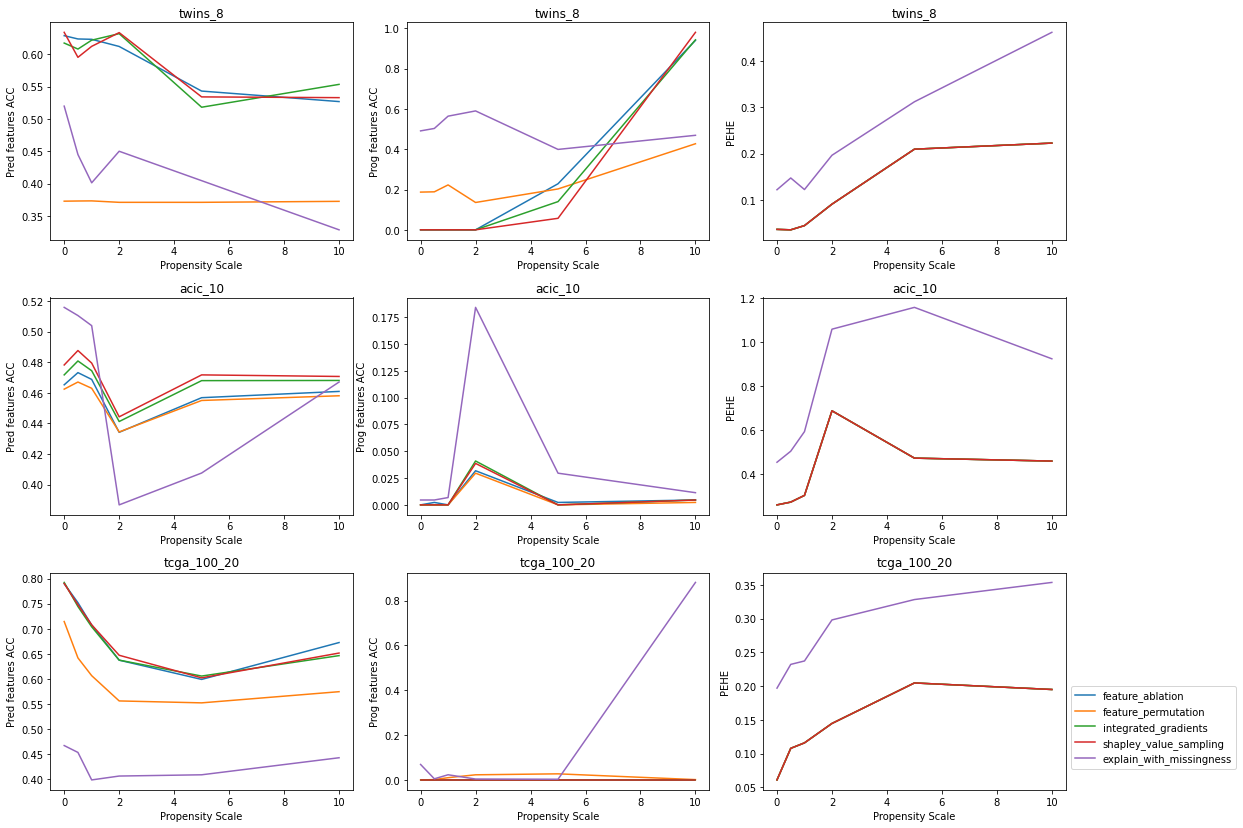

In [41]:

propensity_scale_twins_8_proptype_prog_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1

dataset_list = [
                "twins_8",
                "acic_10",
               "tcga_100_20",
               #"news_100_20"
               ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

explainer = ["feature_ablation",
             "feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "explain_with_missingness"]

plt.figure(figsize=(15,15))

for data_index in range(len(dataset_list)):
    
    
    predictive_sensitivity_acic = pd.read_csv("propensity_sensitivity/linear/propensity_scale_"+ 
                                              dataset_list[data_index]+
                                              "_proptype_pred_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                              index_col = 0)

    predictive_sensitivity_acic_mask = pd.read_csv("propensity_sensitivity_mask/linear/propensity_scale_"+
                                                      dataset_list[data_index]+
                                                   "_proptype_pred_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                                   index_col=0)
    
    DRLearner = predictive_sensitivity_acic[predictive_sensitivity_acic.Learner == "DRLearner"]

    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainer:
            if e == "explain_with_missingness":
                plt.plot(predictive_sensitivity_acic_mask["Propensity Scale"], predictive_sensitivity_acic_mask[metric]
                  ,label="explain_with_missingness")
            else:
                data = DRLearner[DRLearner.Explainer == e]
                plt.plot(data["Propensity Scale"], data[metric], label=e)

        plt.xlabel("Propensity Scale")
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5))


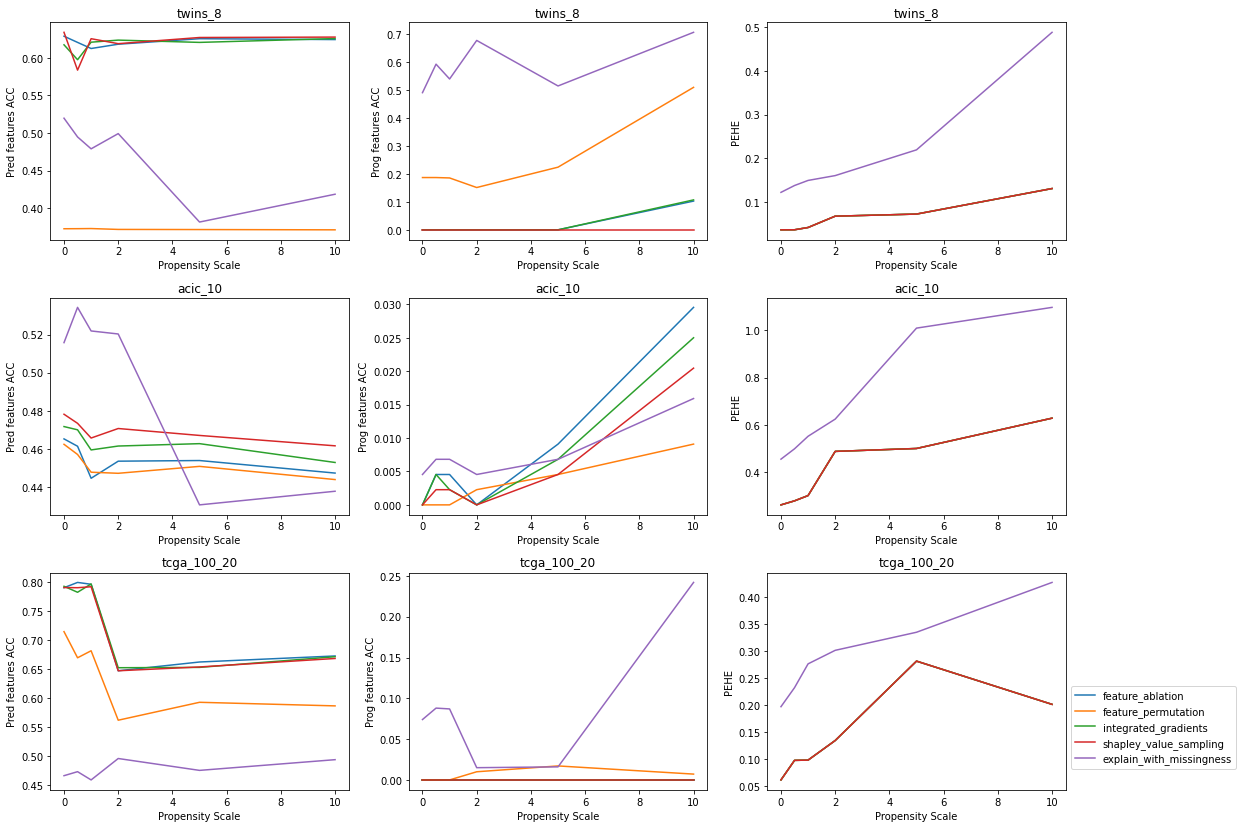

In [37]:
dataset_list = [
                "twins_8",
                "acic_10",
               "tcga_100_20",
               #"news_100_20"
               ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

explainer = ["feature_ablation",
             "feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "explain_with_missingness"]

plt.figure(figsize=(15,15))

for data_index in range(len(dataset_list)):
    
    predictive_sensitivity_acic = pd.read_csv("propensity_sensitivity/linear/propensity_scale_"+ 
                                              dataset_list[data_index]+
                                              "_proptype_prog_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                              index_col = 0)

    predictive_sensitivity_acic_mask = pd.read_csv("propensity_sensitivity_mask/linear/propensity_scale_"+
                                                      dataset_list[data_index]+
                                                   "_proptype_prog_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                                   index_col=0)
    
    DRLearner = predictive_sensitivity_acic[predictive_sensitivity_acic.Learner == "DRLearner"]

    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainer:
            if e == "explain_with_missingness":
                plt.plot(predictive_sensitivity_acic_mask["Propensity Scale"], predictive_sensitivity_acic_mask[metric]
                  ,label="explain_with_missingness")
            else:
                data = DRLearner[DRLearner.Explainer == e]
                plt.plot(data["Propensity Scale"], data[metric], label=e)

        plt.xlabel("Propensity Scale")
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5))


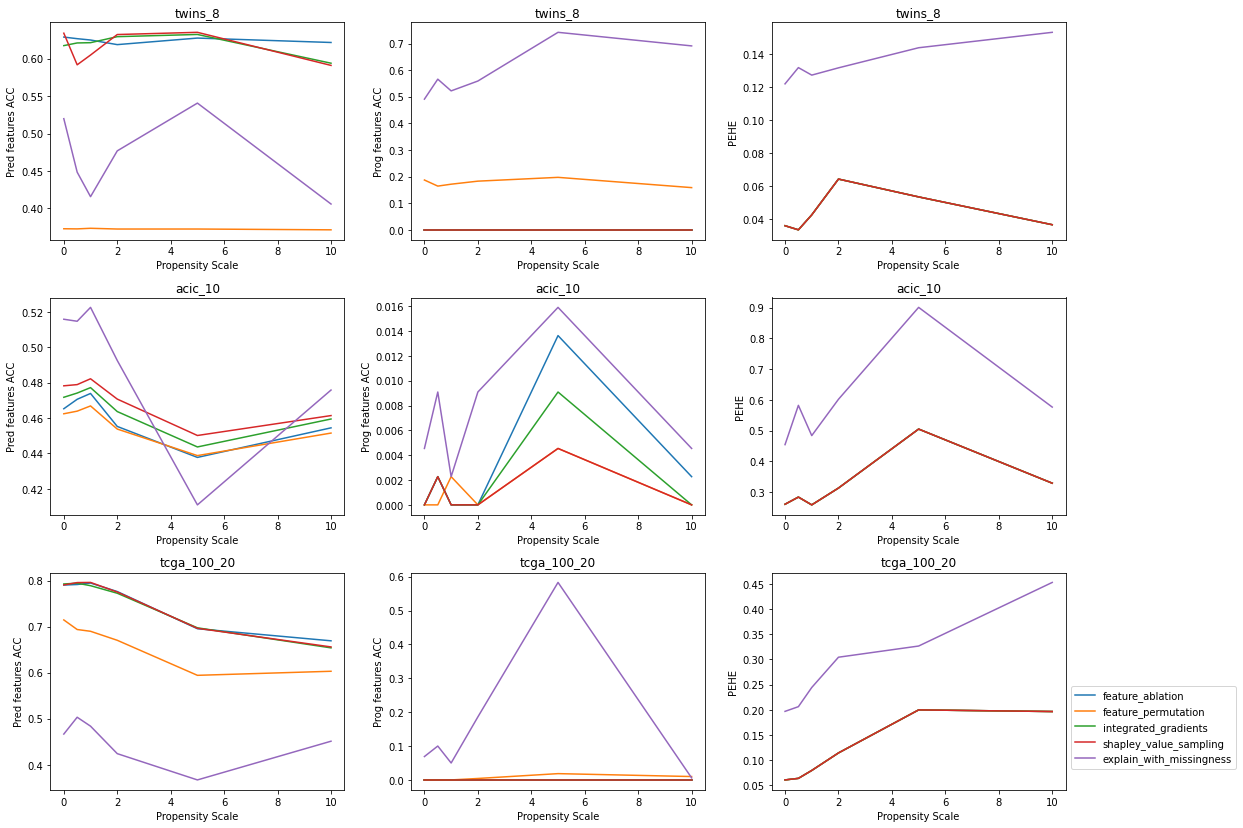

In [38]:
dataset_list = [
                "twins_8",
                "acic_10",
               "tcga_100_20",
               #"news_100_20"
               ]

metrics = ["Pred features ACC",
           "Prog features ACC",
           "PEHE"]

explainer = ["feature_ablation",
             "feature_permutation",
             "integrated_gradients",
             "shapley_value_sampling",
             "explain_with_missingness"]

plt.figure(figsize=(15,15))

for data_index in range(len(dataset_list)):
    
    
    predictive_sensitivity_acic = pd.read_csv("propensity_sensitivity/linear/propensity_scale_"+ 
                                              dataset_list[data_index]+
                                              "_proptype_irrelevant_var_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                              index_col = 0)

    predictive_sensitivity_acic_mask = pd.read_csv("propensity_sensitivity_mask/linear/propensity_scale_"+
                                                      dataset_list[data_index]+
                                                   "_proptype_irrelevant_var_predscl_1.0_nonlinscl_0.5_trainratio_0.8_binary_False-seed1.csv",
                                                   index_col=0)
    DRLearner = predictive_sensitivity_acic[predictive_sensitivity_acic.Learner == "DRLearner"]

    for metric_index in range(len(metrics)):
        metric = metrics[metric_index]

        plt.subplot(4, 3, 3*data_index+metric_index+1)

        for e in explainer:
            if e == "explain_with_missingness":
                plt.plot(predictive_sensitivity_acic_mask["Propensity Scale"], predictive_sensitivity_acic_mask[metric]
                  ,label="explain_with_missingness")
            else:
                data = DRLearner[DRLearner.Explainer == e]
                plt.plot(data["Propensity Scale"], data[metric], label=e)

        plt.xlabel("Propensity Scale")
        plt.ylabel(metric)
        plt.title(dataset_list[data_index])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 0.5))


In [ ]:
cblind_palete = sns.color_palette("colorblind", as_cmap=True)
learner_colors = {
    "SLearner": cblind_palete[0],
    "TLearner": cblind_palete[1],
    "XLearner": cblind_palete[2],
    "TARNet": cblind_palete[3],
    'CFRNet_0.01': cblind_palete[4],
    "CFRNet_0.001": cblind_palete[6],
    'CFRNet_0.0001': cblind_palete[9],
    "DRLearner": cblind_palete[7],
    "DRLearnerMask":  cblind_palete[7],
    "RALearner": cblind_palete[9],
    "Truth": cblind_palete[9],
}

learner_linestyles = {
    "SLearner": "-",
    "TLearner": "--",
    "XLearner": ":",
    "TARNet": "-.",
    "XLearner": "--",
    "CFRNet_0.01": "-",
    "CFRNet_0.001": ":",
    "CFRNet_0.0001": "--",
    "DRLearner": "-",
    "RALearner": "--",
    "Truth": ":",
    "DRLearnerMask": "-"

}


learner_markers = {
    "SLearner": "d",
    "TLearner": "o",
    "XLearner": "^",
    "TARNet": "*",
    "XLearner": "D",
    "CFRNet_0.01": "8",
    "CFRNet_0.001": "s",
    "CFRNet_0.0001": "x",
    "DRLearner": "x",
    "RALearner": "H",
    "Truth": "<",
    "DRLearnerMask": "x"
}

datasets_names_map = {
    "tcga_100": "TCGA", 
    "twins": "Twins", 
    "news_100": "News", 
    "acic": "ACIC2016", 
    "pred": "Predictive confounding", 
    "prog": "Prognostic confounding", 
    "irrelevant_var": "Non-confounded propensity"}

metric_names_map = {
    'Pred features ACC': r'$\mathrm{Attr}_{\mathrm{pred}}$',
    'Prog features ACC': r'$\mathrm{Attr}_{\mathrm{prog}}$',
    'PEHE': 'PEHE',
}

learners_names_map = {
    "TLearner":"T-Learner", 
    "SLearner": "S-Learner", 
    "TARNet": "TARNet",  
    "DRLearner": "DR-Learner", 
    "DRLearnerMask": "DRLearnerMask",
    "XLearner": "X-Learner", 
    "TARNet": "TARNet",
    "CFRNet_0.001": r'$\mathrm{CFRNet}(\gamma=0.001)$',  
    "CFRNet_0.01": r'$\mathrm{CFRNet}(\gamma=0.1)$', 
    "CFRNet_0.0001": r'$\mathrm{CFRNet}(\gamma=0.0001)$',
}


def plot_results_datasets(results_df_map, x_axis, x_label_name, x_values_to_plot, metrics_list, learners_list, figsize, legend_position, sharey=False, legend_rows=1): 
    font_size=20
    fig, axs = plt.subplots(len(metrics_list), len(results_df_map.keys()), figsize=figsize, squeeze=False, sharey=sharey)
    plt.gcf().subplots_adjust(bottom=0.15)
    for dataset_id, dataset in enumerate(results_df_map.keys()):
        results_df = results_df_map[dataset]
        for metric_id, metric in enumerate(metrics_list):
            for learner_id, learner in enumerate(learners_list):
                sub_df = results_df.loc[(results_df["Learner"] == learner)][[x_axis, metric]]

                sub_df = sub_df[sub_df[x_axis].isin(x_values_to_plot)]

                sub_df_mean = sub_df.groupby(x_axis).agg('mean').reset_index()
                sub_df_std = sub_df.groupby(x_axis).agg('std').reset_index()

                x_values = sub_df_mean.loc[:, x_axis].values
                y_values = sub_df_mean.loc[:, metric].values
                y_err = sub_df_std.loc[:, metric].values / (np.sqrt(len(seeds_list)))
                
                axs[metric_id][dataset_id].plot(x_values, y_values, label=learners_names_map[learner], 
                                                          color=learner_colors[learner], linestyle=learner_linestyles[learner], marker=learner_markers[learner])
                axs[metric_id][dataset_id].fill_between(x_values, y_values-y_err, y_values+y_err, alpha=0.1, color=learner_colors[learner])
                axs[metric_id][0].set_ylabel(metric_names_map[metric], fontsize=font_size)
                axs[metric_id][dataset_id].tick_params(axis='x', labelsize=font_size-8)
                axs[metric_id][dataset_id].tick_params(axis='y', labelsize=font_size-8)

        axs[0][dataset_id].set_title(datasets_names_map[dataset], fontsize=font_size)
        axs[metric_id][dataset_id].set_xlabel(x_label_name, fontsize=font_size)
    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(
        lines[:len(learners_list)],
        labels[:len(learners_list)],
        bbox_to_anchor=(legend_position, 0.0),
        ncol=len(learners_list) if legend_rows == 1 else int((len(learners_list)+1)/legend_rows),
        prop={'size': font_size}
    )
    fig.tight_layout()
    
    plt.show()
    return fig

In [ ]:
def aggregate_results_and_plot_predictive_sensitivity(
    datasets_list, 
    num_important_features_list, 
    explainer, 
    metrics_list, 
    synthetic_simulator_type, 
    binary_outcome, 
    seeds_list
):
    results_path = 'predictive_sensitivity/random'
    results_df_map = {}
    
    figsize = (18, 9)
    legend_position = 0.97
    
    for dataset_id, dataset in enumerate(datasets_list):
        results_df_list = []
        for seed in seeds_list:
            results_filename = f"predictive_scale_{dataset}_{num_important_features_list[dataset_id]}_{synthetic_simulator_type}_random_True_binary_{binary_outcome}-seed{seed}.csv"
            results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
        results_df = pd.concat(results_df_list)

        results_df = results_df[results_df['Explainer']==explainer]
        results_df_map[dataset] = results_df

    fig = plot_results_datasets(results_df_map=results_df_map, x_axis='Predictive Scale', x_label_name=r'$\omega_{\mathrm{pred}}$', 
                 x_values_to_plot=[1e-3, 1e-2, 1e-1, 0.5, 1], metrics_list=metrics_list,
                 learners_list=[ "DRLearner",
                                #"XLearner",
                                #"DRLearnerMask"
                                ], 
                 figsize=figsize, legend_position=legend_position)
    fig.savefig("results/results_figs/" + "predictive_scale" + "_" + explainer + ".pdf", bbox_inches="tight")
        
def aggregate_results_and_plot_nonlinearity_sensitivity(
    datasets_list, 
    num_important_features_list, 
    explainer, 
    metrics_list, 
    binary_outcome, 
    seeds_list
):
    results_path = 'nonlinearity_sensitivity/random'
    results_df_map = {}
    
    figsize = (18, 6)
    legend_position = 0.97
    
    for dataset_id, dataset in enumerate(datasets_list):
        results_df_list = []
        for seed in seeds_list:
            results_filename = f"{dataset}_{num_important_features_list[dataset_id]}_binary_{binary_outcome}-seed{seed}.csv"
            results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
        results_df = pd.concat(results_df_list)
        results_df = results_df[results_df['Explainer']==explainer]
        results_df_map[dataset] = results_df
    
    fig = plot_results_datasets(results_df_map=results_df_map, x_axis="Nonlinearity Scale", x_label_name=r'$\omega_{\mathrm{nl}}$', 
                 x_values_to_plot=[0.0, 0.2, 0.5, 0.7, 1.0], metrics_list=metrics_list,
                 learners_list=[#"TLearner", 
                                #"SLearner", 
                                "DRLearner", 
                                #"XLearner", 
                                #"TARNet"],
                 ], 
                 figsize=figsize, legend_position=legend_position)
    fig.savefig("results/results_figs/" + "nonlinearity_sensitivity" + "_" + explainer + ".pdf", bbox_inches="tight")

    
def aggregate_results_and_plot_propensity_sensitivity(
    dataset, 
    num_important_features, 
    explainer, 
    metrics_list, 
    binary_outcome, 
    simulation, 
    train_ratio, 
    propensity_type_list, 
    seeds_list
):
    results_path = 'propensity_sensitivity/' + str(simulation)
    results_df_map = {}
    
    figsize = (12, 8)
    legend_position = 1.1
    for propensity_type_id, propensity_type in enumerate(propensity_type_list):
        results_df_list = []
        for seed in seeds_list:
            results_filename = f"propensity_scale_{dataset}_{num_important_features}_proptype_{propensity_type}_predscl_1.0_nonlinscl_0.5_trainratio_{train_ratio}_binary_{binary_outcome}-seed{seed}.csv"
            results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
        results_df = pd.concat(results_df_list)
        results_df = results_df[results_df['Explainer']==explainer]
        results_df_map[propensity_type] = results_df
    
    fig = plot_results_datasets(results_df_map=results_df_map, x_axis="Propensity Scale", x_label_name=r'$\omega_{\pi}$', 
                 x_values_to_plot=[0, 1e-1, 1, 2, 5, 10], metrics_list=metrics_list,
                 learners_list=[
                    "TLearner",
                    "TARNet",
                    "SLearner",
                    "CFRNet_0.01",
                    "DRLearner",
                    "CFRNet_0.001",
                    "XLearner",
                    "CFRNet_0.0001"
                ],
                 figsize=figsize, legend_position=legend_position, sharey="row", legend_rows=2)
    fig.savefig("results/results_figs/" + "propensity_sensitivity" + "_" + simulation + "_" + str(train_ratio) + "_" + dataset + ".pdf", bbox_inches="tight")

In [ ]:
top_10 = pd.read_csv("top_10_fatures_survival.csv",index_col =0)
signs = np.load("feature_sign.npy")

feature_list = top_10.feature.tolist()
feature_cols = ['age', 'scenegcs', 'scenefirstbloodpressure', 
                'scenefirstpulse', 'scenefirstrespirationrate', 'edfirstbp', 'edfirstpulse', 'edfirstrespirationrate', 'temps2', 'edgcs', 'causecode_ABUSE', 'causecode_AIR', 
                'causecode_BIKE', 'causecode_BITES', 'causecode_CUT', 'causecode_DROWN', 'causecode_ENVIRON', 'causecode_EXPLOSION', 'causecode_FALL', 'causecode_GUN', 'causecode_MACHINE', 
                'causecode_MC', 'causecode_MV', 'causecode_OTHER', 'causecode_PEDESTRIAN',
                'causecode_POISON', 'causecode_RAILWAY', 'causecode_SMOKE', 'causecode_STRUCK', 'causecode_SUFFOCATIO', 'causecode_SUFFOCATION', 'causecode_TRANSPORT', 'causecode_WATER', 
                'ethnicity_H', 'ethnicity_Hispanic or Latino', 'ethnicity_N', 'sex_F', 'sex_M', 'residencestate_AK', 'residencestate_AZ', 'residencestate_CA', 'residencestate_ID', 'residencestate_IN',
                'residencestate_MA', 'residencestate_MD', 'residencestate_MT', 'residencestate_NV', 'residencestate_OK', 'residencestate_OR', 'residencestate_UT', 'residencestate_WA', 'traumatype_B', 
                'traumatype_OTHER', 'traumatype_P', 'BD', 'CFSS', 'COHB', 'CREAT', 'FIB', 'FIO2', 'HCT', 'HGB', 'INR', 'LAC', 'NA', 'PAO2', 'PH', 'PLTS', 'PTT', 'TT', 'toxicologyresults_AMPH', 'toxicologyresults_BARB', 
                'toxicologyresults_BEN', 'toxicologyresults_COC', 'toxicologyresults_MARI', 'toxicologyresults_MDN', 'toxicologyresults_METH', 'toxicologyresults_NEG', 'toxicologyresults_OPIA', 'toxicologyresults_PCP', 'toxicologyresults_TRI']
index = []

for i in feature_list:
  index.append(feature_cols.index(i))

top_10["sign"] = signs[index]

,feature,count (%),sign
2,LAC,90.0,1.0
8,traumatype_P,90.0,1.0
6,toxicologyresults_NEG,80.0,1.0
5,sex_M,70.0,1.0
0,causecode_FALL,60.0,1.0
7,traumatype_B,60.0,-1.0
16,causecode_CUT,60.0,-1.0
12,BD,60.0,-1.0
4,edgcs,40.0,-1.0
9,sex_F,40.0,1.0


# Linear + random

In [ ]:
seeds_list = list(range(1, 2))
metrics_to_plot = ['Pred features ACC', 'Prog features ACC', 'PEHE']
explainer='shapley_value_sampling'
datasets_list = [#'tcga_100',
                 'twins', 
                # 'news_100', 
                 'acic']

num_important_features_list = [#20, 
                               8, 
                              # 20, 
                               10]

seeds_list

[1]

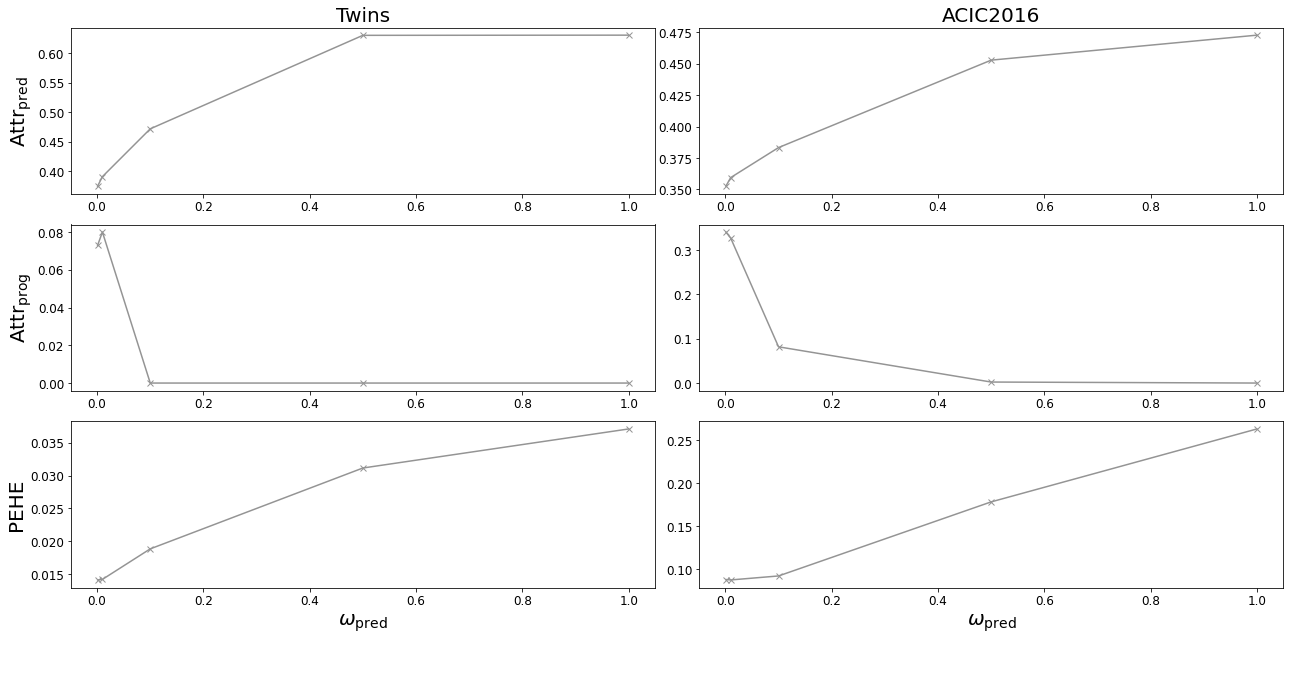

In [ ]:
aggregate_results_and_plot_predictive_sensitivity(datasets_list=datasets_list, 
                                                  num_important_features_list=num_important_features_list, 
                                                  explainer=explainer, 
                                                  metrics_list=metrics_to_plot, 
                                                  synthetic_simulator_type='linear', 
                                                  binary_outcome='False', 
                                                  seeds_list=seeds_list)

In [ ]:
seeds_list = list(range(1, 30))
metrics_to_plot = ['Pred features ACC', 'Prog features ACC',]
aggregate_results_and_plot_nonlinearity_sensitivity(datasets_list=datasets_list, num_important_features_list=num_important_features_list, explainer=explainer, metrics_list=metrics_to_plot, 
                                                  binary_outcome='False', seeds_list=seeds_list)

# Non-linear sensitivity

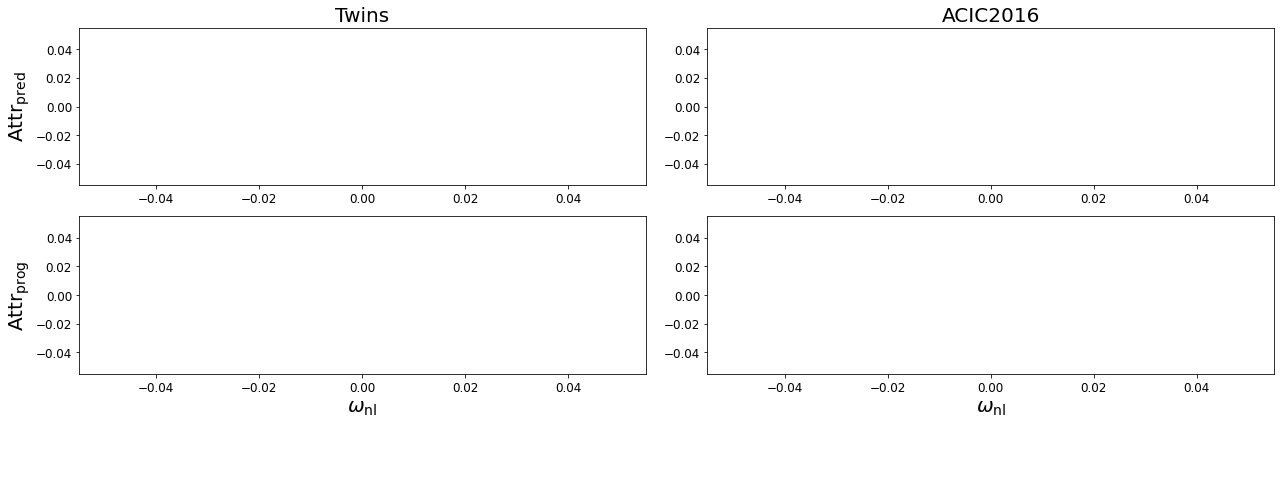

In [ ]:
seeds_list = list(range(1, 2))

metrics_to_plot = ['Pred features ACC', 'Prog features ACC', 'PEHE']
explainer='shapley_value_sampling'
datasets_list = [#'tcga_100',
                 'twins', 
                # 'news_100', 
                 'acic']

num_important_features_list = [#20, 
                               8, 
                              # 20, 
                               10]

metrics_to_plot = ['Pred features ACC', 'Prog features ACC',]
aggregate_results_and_plot_nonlinearity_sensitivity(datasets_list=datasets_list, 
                                                    num_important_features_list=num_important_features_list,
                                                    explainer=explainer, 
                                                    metrics_list=metrics_to_plot, 
                                                    binary_outcome='False', 
                                                    seeds_list=seeds_list)

# Propensity sensitivity

In [ ]:
propensity_type_list = ['pred', 'prog', 'irrelevant_var']
metrics_to_plot = ['Pred features ACC', 'PEHE']
dataset = 'news_100'
num_important_features = 20
seeds_list = list(range(1, 30))
simulation = 'linear'
train_ratio = 0.8

In [ ]:
aggregate_results_and_plot_propensity_sensitivity(
    dataset=dataset,
    num_important_features=num_important_features,
    propensity_type_list=propensity_type_list,
    explainer=explainer,
    metrics_list=metrics_to_plot,
    binary_outcome='False',
    simulation=simulation,
    train_ratio=train_ratio,
    seeds_list=seeds_list
)

FileNotFoundError: ignored

In [ ]:
propensity_type_list = ['pred', 'prog', 'irrelevant_var']
metrics_to_plot = ['Pred features ACC', 'PEHE']
dataset = 'news_100'
num_important_features = 20
seeds_list = list(range(1, 30))
simulation = 'linear'
train_ratio = 0.8

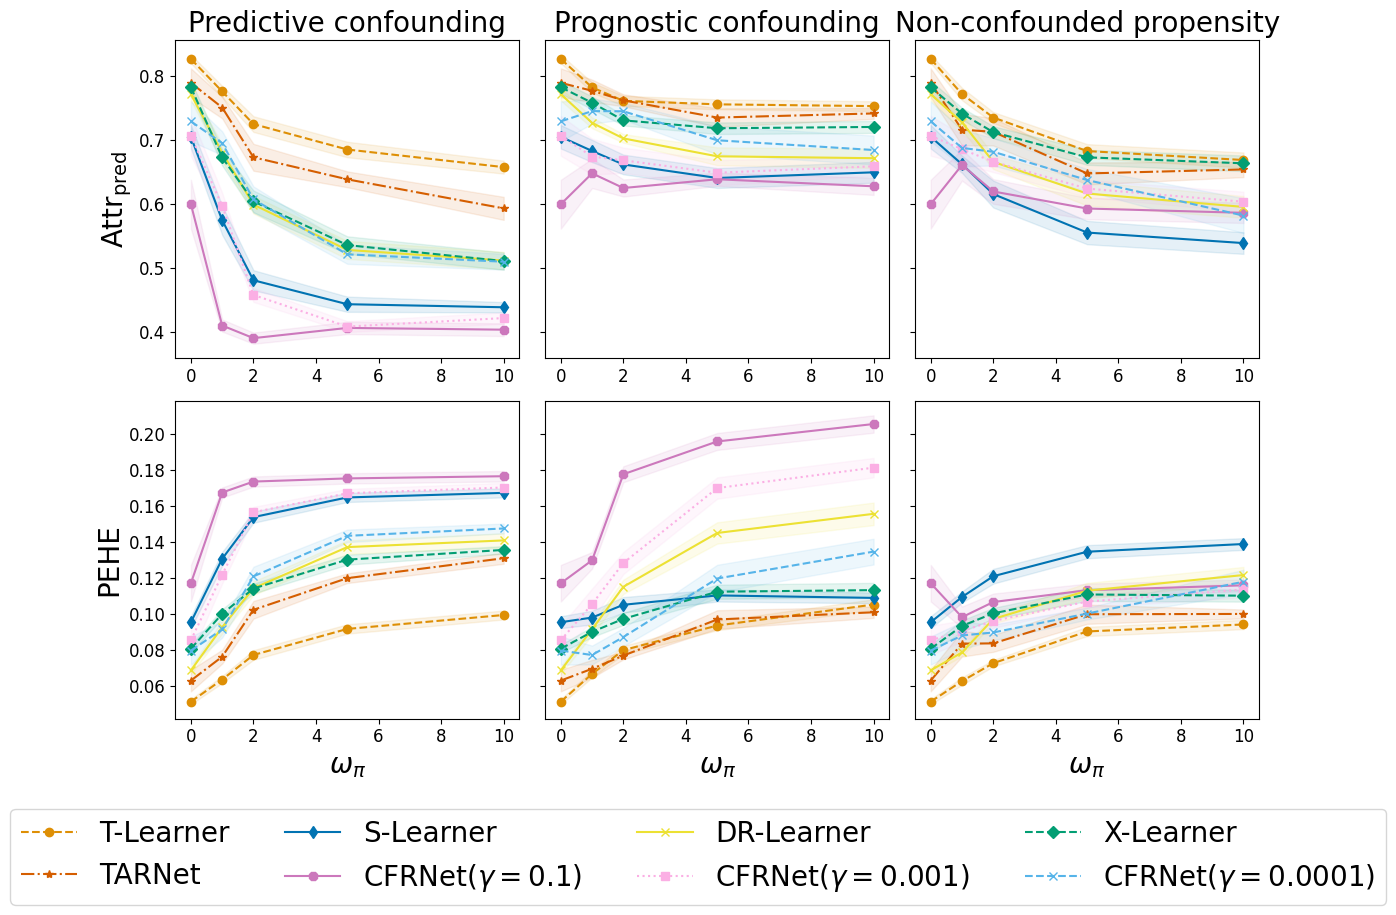

In [ ]:
aggregate_results_and_plot_propensity_sensitivity(
    dataset=dataset,
    num_important_features=num_important_features,
    propensity_type_list=propensity_type_list,
    explainer=explainer,
    metrics_list=metrics_to_plot,
    binary_outcome='False',
    simulation=simulation,
    train_ratio=train_ratio,
    seeds_list=seeds_list
)